## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
pima = pd.DataFrame(pd.read_csv('PimaDiabetes.csv'))
to_predict = pd.DataFrame(pd.read_csv('ToPredict.csv'))

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [4]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,3.844000,120.737333,68.982667,20.489333,80.378667,31.959067,0.473544,33.166667,0.346667
std,3.370085,32.019671,19.508814,15.918828,115.019198,7.927399,0.332119,11.708872,0.476226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.000000,0.377000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.750000,36.575000,0.628500,40.750000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
(pima == 0).sum(axis=0)

Pregnancies         109
Glucose               5
BloodPressure        35
SkinThickness       221
Insulin             362
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome             490
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigree'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

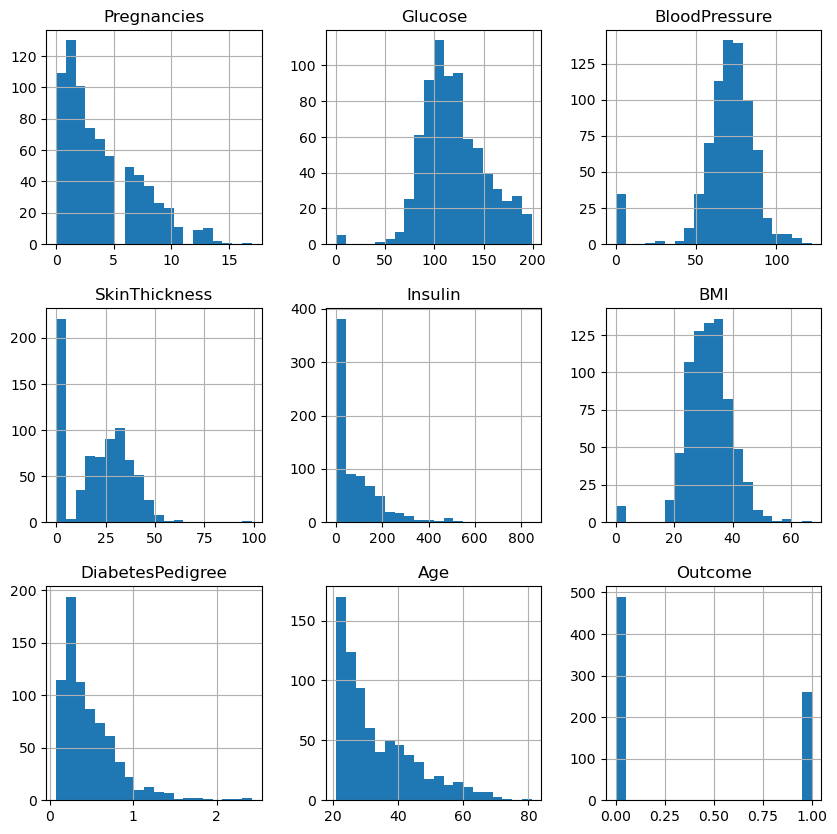

In [6]:
pima.hist(figsize=[10,10], bins=20)

In [7]:
pima.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.129594,0.142453,-0.087047,-0.070822,0.021739,-0.031085,0.547124,0.229235
Glucose,0.129594,1.000000,0.145972,0.056647,0.333005,0.214316,0.140364,0.259797,0.460310
BloodPressure,0.142453,0.145972,1.000000,0.205494,0.086750,0.278569,0.042922,0.237693,0.060860
SkinThickness,-0.087047,0.056647,0.205494,1.000000,0.436093,0.394615,0.189191,-0.115862,0.082205
Insulin,-0.070822,0.333005,0.086750,0.436093,1.000000,0.195726,0.191289,-0.040152,0.130928
BMI,0.021739,0.214316,0.278569,0.394615,0.195726,1.000000,0.143798,0.032972,0.289832
DiabetesPedigree,-0.031085,0.140364,0.042922,0.189191,0.191289,0.143798,1.000000,0.041807,0.170688
Age,0.547124,0.259797,0.237693,-0.115862,-0.040152,0.032972,0.041807,1.000000,0.232892
Outcome,0.229235,0.460310,0.060860,0.082205,0.130928,0.289832,0.170688,0.232892,1.000000


<AxesSubplot:>

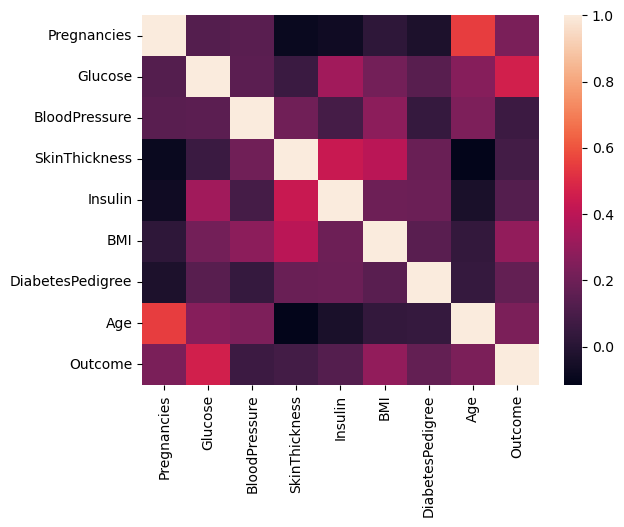

In [8]:
sns.heatmap(pima.corr())

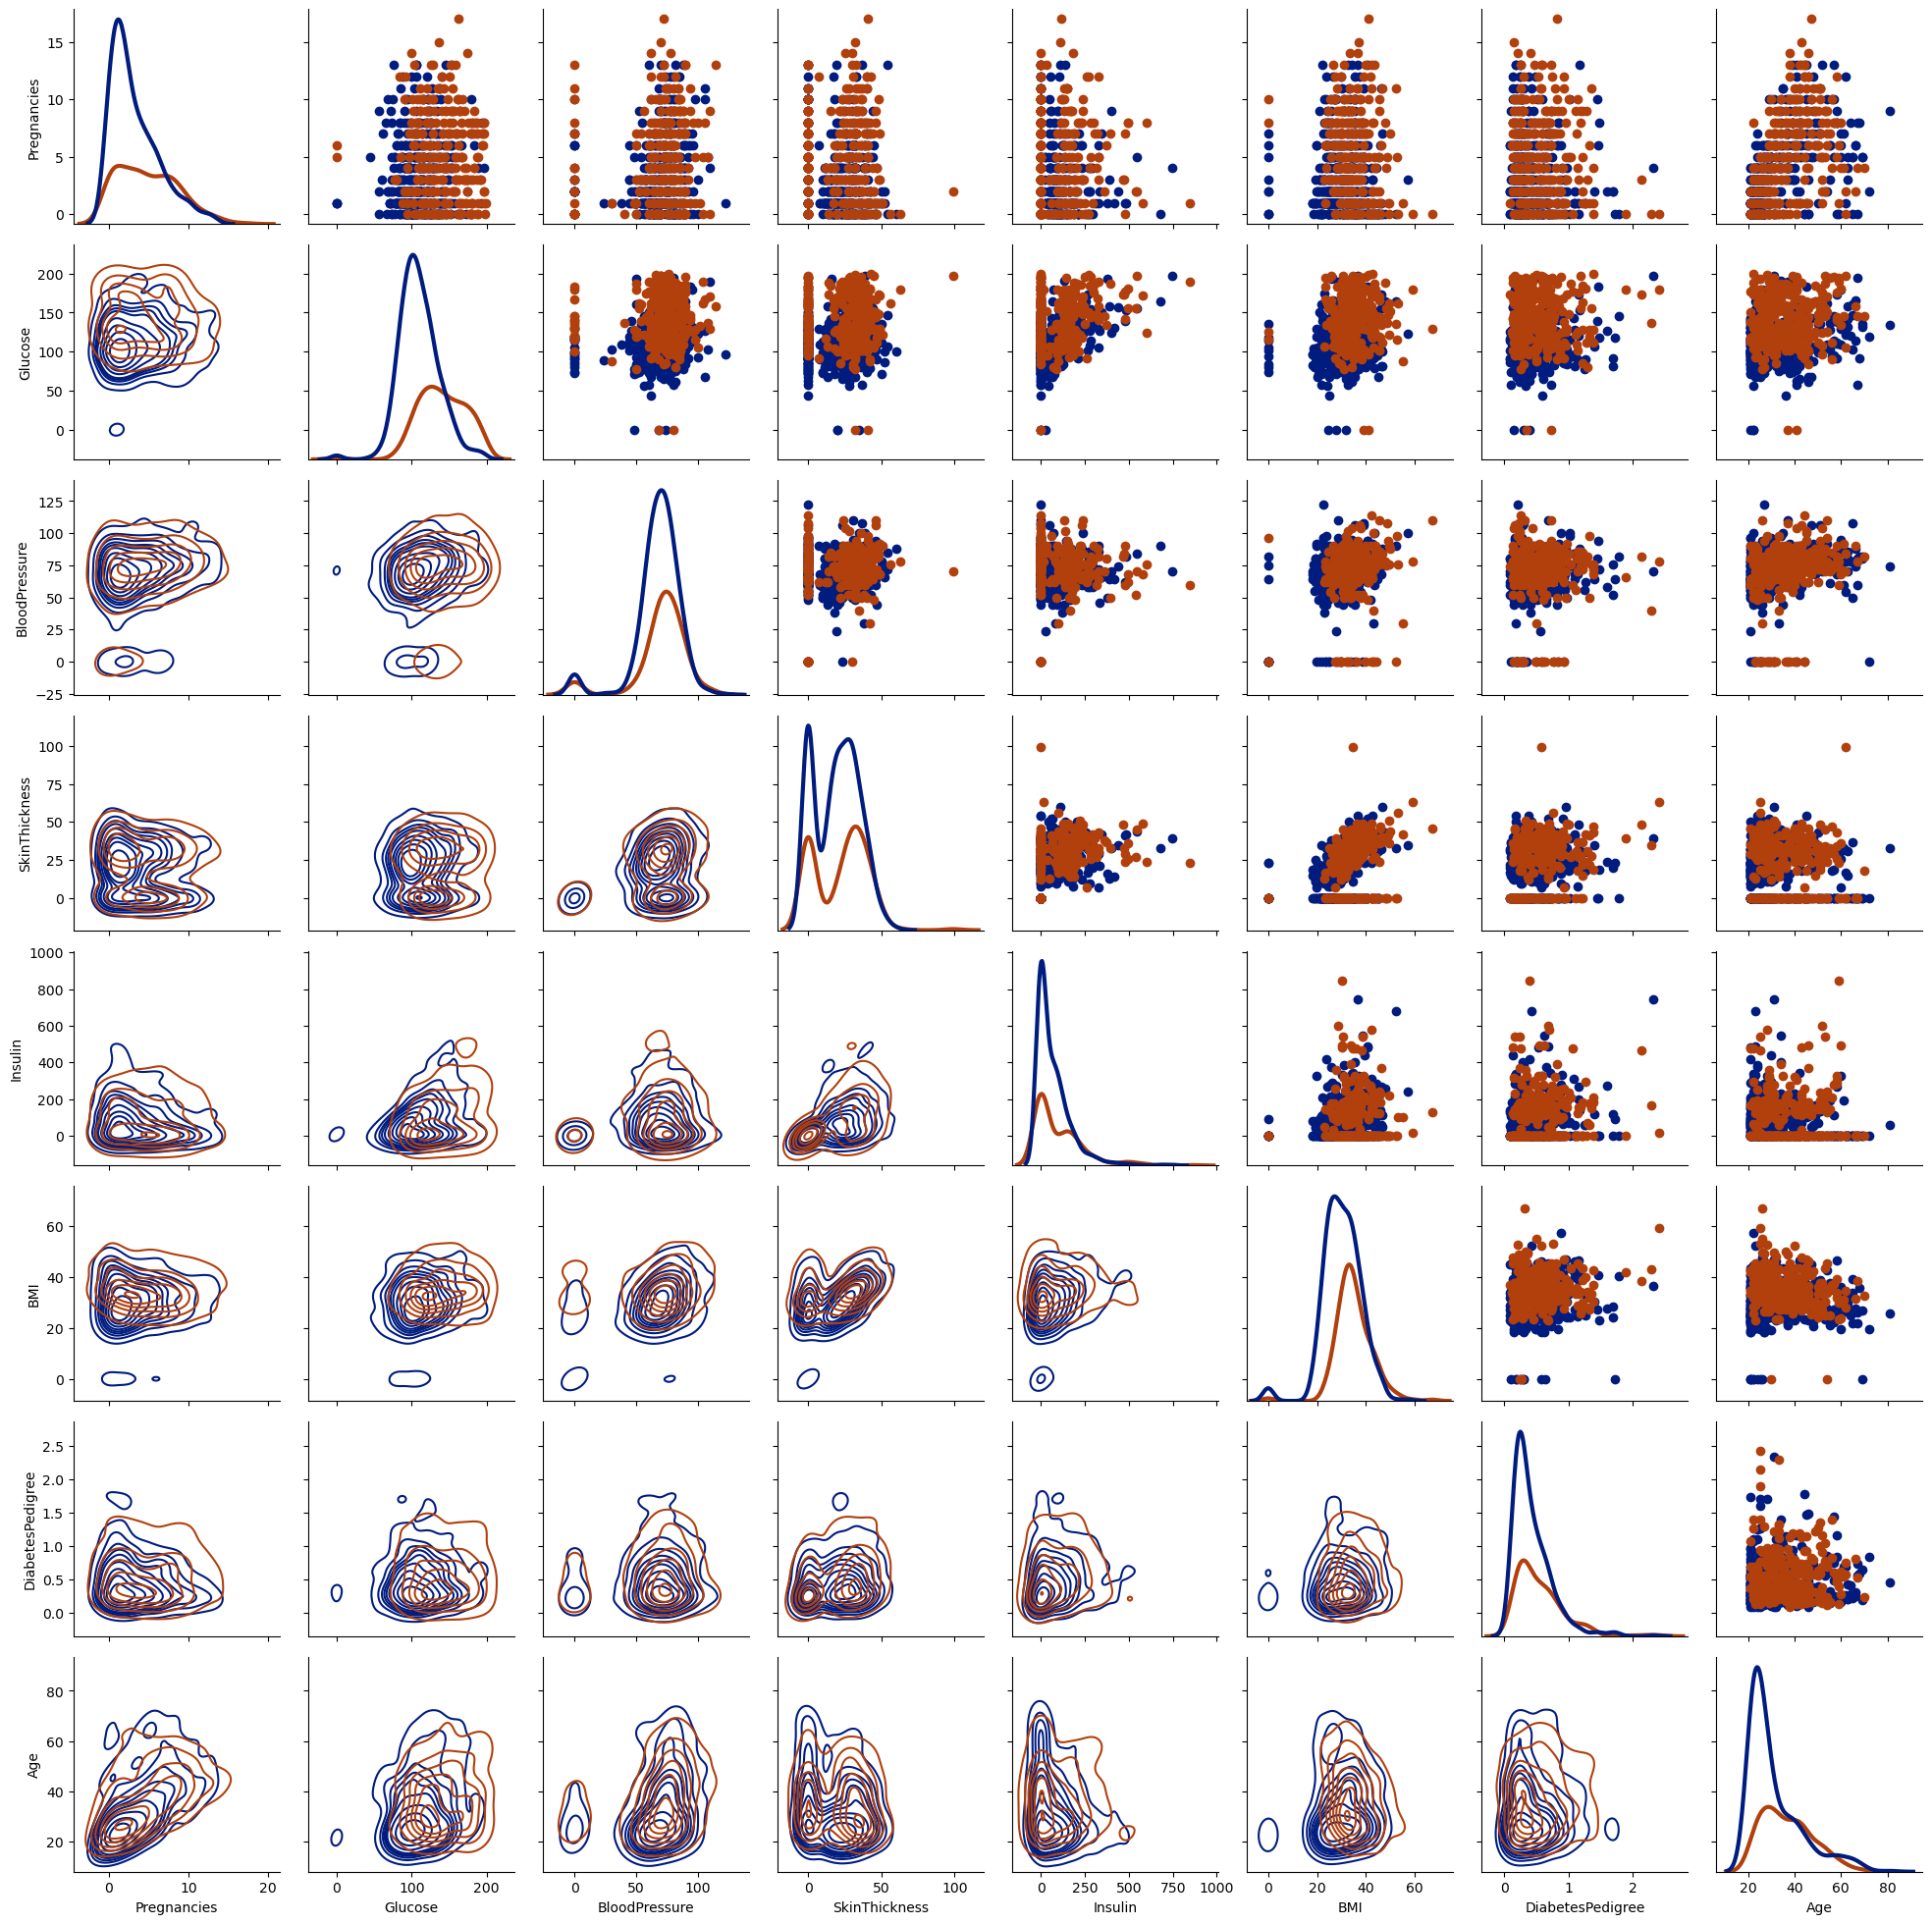

In [9]:
g = sns.PairGrid(pima, diag_sharey=False, hue="Outcome", palette="dark")
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

## Simple Regression

### Training

In [10]:
threeOrMoreKids = []
for i in range(pima.shape[0]):
    numKids = pima.at[i, 'Pregnancies']
    if numKids >= 3:
        moreThanThree = 1
    else:
        moreThanThree = 0
    threeOrMoreKids.append(moreThanThree)

threeOrMoreKids_series = pd.Series(threeOrMoreKids)

pima['threeOrMoreKids'] = threeOrMoreKids_series

In [11]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,threeOrMoreKids
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0


In [12]:
from sklearn.linear_model import LogisticRegression
q3_model = LogisticRegression()
outcome_array = pima['Outcome'].to_numpy()
kids_array = pima['threeOrMoreKids'].to_numpy()
q3_model.fit(kids_array.reshape(-1,1), outcome_array.reshape(-1,1)
)

/Users/morishitamizuki/opt/anaconda3/envs/sml1/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

### Prediction

In [13]:
threeOrMoreKids = []
for i in range(to_predict.shape[0]):
    numKids = to_predict.at[i, 'Pregnancies']
    if numKids >= 3:
        moreThanThree = 1
    else:
        moreThanThree = 0
    threeOrMoreKids.append(moreThanThree)

threeOrMoreKids_series = pd.Series(threeOrMoreKids)

to_predict['threeOrMoreKids'] = threeOrMoreKids_series

In [14]:
q3_model.predict(to_predict['threeOrMoreKids'].to_numpy().reshape(-1,1))

array([0, 0, 0, 0, 0])

In [15]:
print("coefficient = ", q3_model.coef_)
print("intercept = ", q3_model.intercept_)

coefficient =  [[0.85899942]]
intercept =  [-1.13248515]


In [16]:
q3_model.predict_proba(to_predict['threeOrMoreKids'].to_numpy().reshape(-1,1))

array([[0.56794845, 0.43205155],
       [0.75629723, 0.24370277],
       [0.56794845, 0.43205155],
       [0.75629723, 0.24370277],
       [0.56794845, 0.43205155]])

## Regression with Multiple Explanatory Variables

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = False)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

### Preparation: Make a class to create models and fit or predict with them

In [23]:
class LogisticModel:
  def __init__(self, x_train_dataframe, y_train_dataframe, x_test_dataframe):
    self.x_train_dataframe = x_train_dataframe
    self.y_train_dataframe = y_train_dataframe
    self.x_test_dataframe = x_test_dataframe

  def model_evaluator(self):
    # Normalization of train data
    scaler.fit(self.x_train_dataframe)
    x_train_scaled = scaler.transform(self.x_train_dataframe) 

    # Cross-validation
    model_list = []
    coef_list = []
    intercept_list = []
    accuracy_score_list = []
    cm_list = []

    for train, val in skf.split(x_train_scaled, self.y_train_dataframe):
        train_x = x_train_scaled[train]
        val_x = x_train_scaled[val]
        train_y = self.y_train_dataframe[train]
        val_y = self.y_train_dataframe[val]

        model = LogisticRegression(random_state=0)
        model.fit(train_x, train_y)
        pred = model.predict(val_x)
        print(accuracy_score(val_y, pred))
        accuracy_score_list.append(accuracy_score(val_y, pred))
        model_list.append(model)
        coef_list.append(model.coef_[0])
        intercept_list.append(model.intercept_[0])

        cm = confusion_matrix(val_y, pred)
        cm_list.append(cm)

    self.model_list = model_list
    self.coef_list = coef_list
    self.intercept_list = intercept_list
    self.model_table = pd.concat([pd.DataFrame(intercept_list, columns = ['intercept']), pd.DataFrame(coef_list)], axis = 1)

    self.ave_accuracy = sum(accuracy_score_list)/len(accuracy_score_list)

    self.cm_list = cm_list
    ave_cm = [[0,0],[0,0]]    
    for i in range(len(cm_list)):
        # iterate through rows
        for j in range(len(cm_list[0])):  
        # iterate through columns
            for k in range(len(cm_list[0][0])):
                ave_cm[j][k] = ave_cm[j][k] + cm_list[i][j][k]
    ave_cm = np.array(ave_cm)/5
    self.ave_cm = ave_cm

    return None
  
  def cm_heatmap(self):
    return sns.heatmap(self.ave_cm,annot=True)


  def predict(self):
    solution = {}
    probability = {}

    # Normalization of test data
    scaler.fit(self.x_test_dataframe)
    x_test_scaled = scaler.transform(self.x_test_dataframe) 

    for i, model in enumerate(self.model_list):
        test_pred = model.predict(x_test_scaled)
        solution["model_"+str(i)] = test_pred

        probability["model_"+str(i)] = model.predict_proba(x_test_scaled)[:,1]

    solution=pd.DataFrame(solution)
    self.solution = solution

    probability=pd.DataFrame(probability)
    self.probability = probability
    return solution

### Model1: All Variables

In [24]:
# train data
x_train5_1 = pima[pima.columns[(pima.columns != "threeOrMoreKids") & (pima.columns !="Outcome")]]
y_train5 = pima[pima.columns[pima.columns == "Outcome"]].values.ravel()

# test data
x_test5_1 = to_predict[to_predict.columns[(to_predict.columns != "threeOrMoreKids")]]


model5_1 = LogisticModel(x_train5_1, y_train5, x_test5_1)

In [25]:
x_train5_1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')

In [26]:
model5_1.model_evaluator()

0.7733333333333333
0.7533333333333333
0.7533333333333333
0.78
0.7666666666666667


In [27]:
model5_1.ave_accuracy

0.7653333333333332

In [28]:
model5_1.model_table

,intercept,0,1,2,3,4,5,6,7
0,-0.893992,0.555427,1.147136,-0.278751,0.055253,-0.195414,0.684276,0.326104,0.037290
1,-0.840923,0.354078,1.106567,-0.253981,0.078508,-0.042962,0.676828,0.178649,0.250703
2,-0.916101,0.492365,1.099161,-0.326835,0.047066,-0.126693,0.662386,0.342605,0.158032
3,-0.874775,0.417407,1.110866,-0.217603,0.071107,-0.221795,0.600418,0.263141,0.207693
4,-0.871398,0.394409,1.017058,-0.190763,-0.035478,-0.094301,0.789599,0.335041,0.101801


In [29]:
model5_1.ave_cm

array([[85.8, 12.2],
       [23. , 29. ]])

<AxesSubplot:>

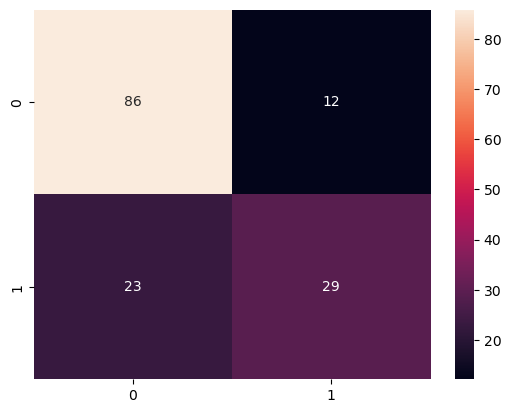

In [30]:
model5_1.cm_heatmap()

In [31]:
model5_1.predict()

,model_0,model_1,model_2,model_3,model_4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,1,1,1,1
4,1,1,1,1,1


In [32]:
model5_1.probability

,model_0,model_1,model_2,model_3,model_4
0,0.380631,0.248978,0.358962,0.314131,0.369707
1,0.134767,0.170794,0.132851,0.151726,0.166996
2,0.046434,0.045694,0.047943,0.049293,0.039928
3,0.583851,0.715786,0.569163,0.590086,0.667061
4,0.636441,0.644473,0.642335,0.673316,0.566740


### Model2: Remove "SkinThickness"

eliminate "SkinThickness"
- Because it has a lot of zeros
- and it is not correlated with the outcome

In [33]:
# train data
x_train5_2 = pima[pima.columns[(pima.columns != "threeOrMoreKids") & (pima.columns !="Outcome") & (pima.columns !="SkinThickness")]]

# test data
x_test5_2 = to_predict[to_predict.columns[(to_predict.columns != "threeOrMoreKids") & (to_predict.columns !="SkinThickness")]]


model5_2 = LogisticModel(x_train5_2, y_train5, x_test5_2)

In [34]:
model5_2.model_evaluator()

0.7666666666666667
0.76
0.7533333333333333
0.78
0.7666666666666667


In [35]:
model5_2.ave_accuracy

0.7653333333333334

No big difference between model 5-1 and 5-2, but slightly improved
→ can eliminate SkinThickness

### Model3: Remove Age

In [36]:
# prepare train data
x_train5_3 = pima[pima.columns[(pima.columns != "Outcome") & (pima.columns != "threeOrMoreKids") & (pima.columns != "SkinThickness") & (pima.columns != "Age")]]

# prepare test data
x_test5_3 = to_predict[to_predict.columns[(to_predict.columns != "threeOrMoreKids") & (to_predict.columns !="SkinThickness") & (to_predict.columns !="Age")]]

# make model
model5_3 = LogisticModel(x_train5_3, y_train5, x_test5_3)
model5_3.model_evaluator()
print(model5_3.ave_accuracy)

0.7666666666666667
0.7533333333333333
0.76
0.7866666666666666
0.76
0.7653333333333334


### Model4: Pregnancies/Age

In [37]:
# prepare train data
x_train5_4 = pima[pima.columns[(pima.columns != "Outcome") & (pima.columns != "threeOrMoreKids") & (pima.columns != "SkinThickness")]]
x_train5_4["preg_per_year"] = x_train5_4.loc[:,'Pregnancies']/ x_train5_4.loc[:,'Age']
x_train5_4_2 = x_train5_4[x_train5_4.columns[(x_train5_4.columns != "Pregnancies") & (x_train5_4.columns != "Age")]]

# prepare test data
x_test5_4 = to_predict[to_predict.columns[(to_predict.columns != "threeOrMoreKids") & (to_predict.columns !="SkinThickness")]]
x_test5_4["preg_per_year"] = x_test5_4['Pregnancies']/ x_test5_4['Age']
x_test5_4_2 = x_test5_4[x_test5_4.columns[(x_test5_4.columns != "Pregnancies") & (x_test5_4.columns != "Age")]]

# make model
model5_4 = LogisticModel(x_train5_4_2, y_train5, x_test5_4_2)
model5_4.model_evaluator()

/var/folders/61/rqxnvzd54cn2vyyxhg42gs5r0000gn/T/ipykernel_3842/2845395130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train5_4["preg_per_year"] = x_train5_4.loc[:,'Pregnancies']/ x_train5_4.loc[:,'Age']
/var/folders/61/rqxnvzd54cn2vyyxhg42gs5r0000gn/T/ipykernel_3842/2845395130.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test5_4["preg_per_year"] = x_test5_4['Pregnancies']/ x_test5_4['Age']


0.7733333333333333
0.78
0.76
0.7933333333333333
0.76


In [38]:
model5_4.ave_accuracy

0.7733333333333334

In [39]:
x_test5_4_2.columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigree',
       'preg_per_year'],
      dtype='object')

In [40]:
model5_4.model_table

,intercept,0,1,2,3,4,5
0,-0.885781,1.192798,-0.221680,-0.196380,0.687498,0.337026,0.551684
1,-0.807439,1.182000,-0.153790,-0.060747,0.664319,0.204932,0.377441
2,-0.903141,1.173743,-0.232472,-0.139488,0.657987,0.361482,0.512504
3,-0.864109,1.184390,-0.135827,-0.220996,0.589902,0.284436,0.455455
4,-0.854087,1.080322,-0.137566,-0.128454,0.755738,0.344565,0.396959


<AxesSubplot:>

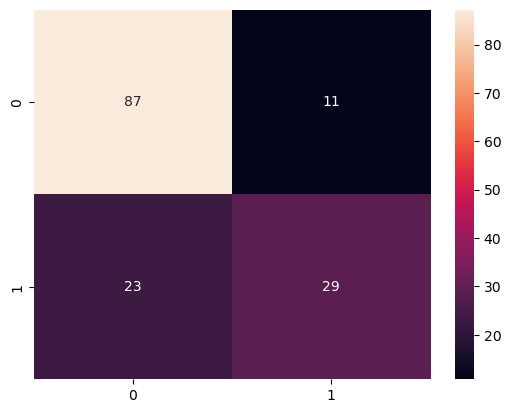

In [41]:
model5_4.cm_heatmap()

In [42]:
model5_4.predict()

,model_0,model_1,model_2,model_3,model_4
0,1,0,1,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,1,1,1,1,1
4,1,0,1,1,0


In [43]:
prob5_4 = model5_4.probability
prob5_4.mean(axis=1)

0    0.471503
1    0.139037
2    0.048259
3    0.639348
4    0.507681
dtype: float64

In [44]:
prob5_4['mean'] = prob5_4.mean(axis=1)

In [45]:
prob5_4.columns = ['model4_1', 'model4_2', 'model4_3', 'model4_4', 'model4_5', 'mean']
prob5_4.index = [1,2,3,4,5]

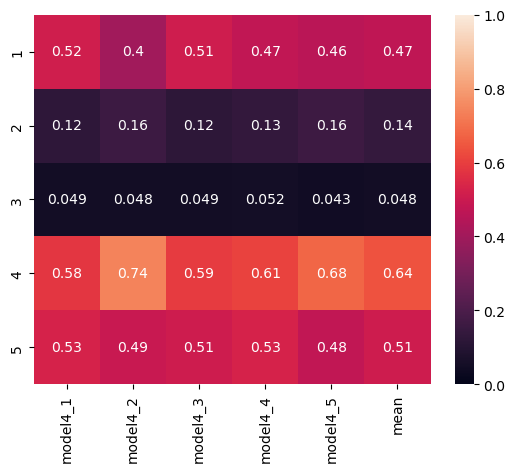

In [46]:
sns.heatmap(prob5_4, annot=True, vmax=1.0, vmin=0.0)
plt.show()

### Model5: Remove Insulin

In [47]:
# prepare train data
x_train5_5 = x_train5_4_2[x_train5_4_2.columns[x_train5_4_2.columns != "Insulin"]]

# prepare test data
x_test5_5 = x_test5_4_2[x_test5_4_2.columns[x_test5_4_2.columns != "Insulin"]]

# make model
model5_5 = LogisticModel(x_train5_5, y_train5, x_test5_5)
model5_5.model_evaluator()

0.7666666666666667
0.78
0.7533333333333333
0.7866666666666666
0.76


In [48]:
model5_5.ave_accuracy

0.7693333333333333

## Visualize Features Used

In [49]:
features_array = np.zeros((5,9))
features1 = [True, True, True, True, True, True, True, True, False]
features2 = [True, True, True, False, True, True, True, True, False]
features3 = [True, True, True, False, True, True, True, False, False]
features4 = [False, True, True, False, True, True, True, False, True]
features5 = [False, True, True, False, False, True, True, False, True]

features_array[0] = features1
features_array[1] = features2
features_array[2] = features3
features_array[3] = features4
features_array[4] = features5

In [50]:
features_array

array([[1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 0., 1., 1., 1., 1., 0.],
       [1., 1., 1., 0., 1., 1., 1., 0., 0.],
       [0., 1., 1., 0., 1., 1., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1., 1., 0., 1.]])

In [51]:
col_names = list(pima.columns[:-2])
col_names.append('PregPerYears')
row_names = ['model1', 'model2', 'model3', 'model4', 'model5']
features_df = pd.DataFrame(features_array, columns=col_names, index=row_names)

In [52]:
features_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,PregPerYears
model1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
model2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
model3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
model4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
model5,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


<AxesSubplot:>

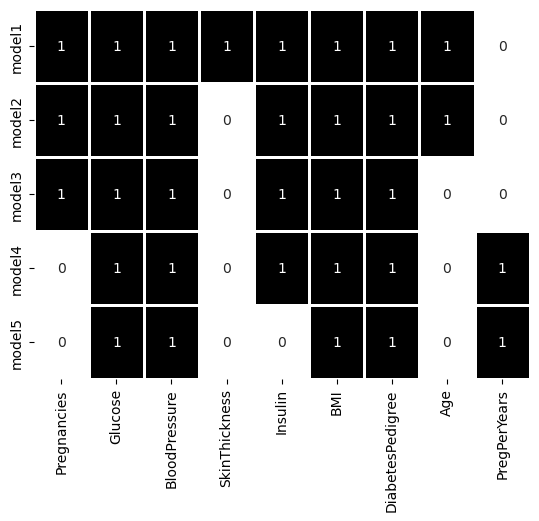

In [53]:
sns.heatmap(features_df, cmap='gray_r', annot=True, cbar=False, linewidth=1)